In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [96]:
df = pd.read_csv('C:/Users/chris/Documents/GitHub/HMTCS/breast cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term (bias) to X
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))  # Adding a column of ones

# Initialize parameters for logistic regression
theta = np.zeros(2)  # One for bias, one for the feature
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Avoid log(0) issues
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Gradient descent for logistic regression
m = len(y)  # Number of samples
cost_history = []

for epoch in range(epochs):
    z = np.dot(X_scaled, theta)  # Compute linear combination
    h = sigmoid(z)  # Apply sigmoid function
    gradient = np.dot(X_scaled.T, (h - y)) / m  # Compute gradient
    theta -= alpha * gradient  # Update parameters
    
    # Compute and store cost
    cost = compute_cost(X_scaled, y, theta)
    cost_history.append(cost)

# Display final parameters
print("Final parameters after training:")
print(f"Intercept (Bias): {theta[0]}")
print(f"Coefficient for 'radius_mean': {theta[1]}")

# Plot cost function over epochs
import matplotlib.pyplot as plt

plt.plot(range(epochs), cost_history, label='Cost Function')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.legend()
plt.show()


ValueError: shapes (569,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

Final parameters after training:
Intercept (Bias): -0.6376685677166432
Coefficient for radius_mean': 2.9343671176145945
Model Accuracy: 88.22%


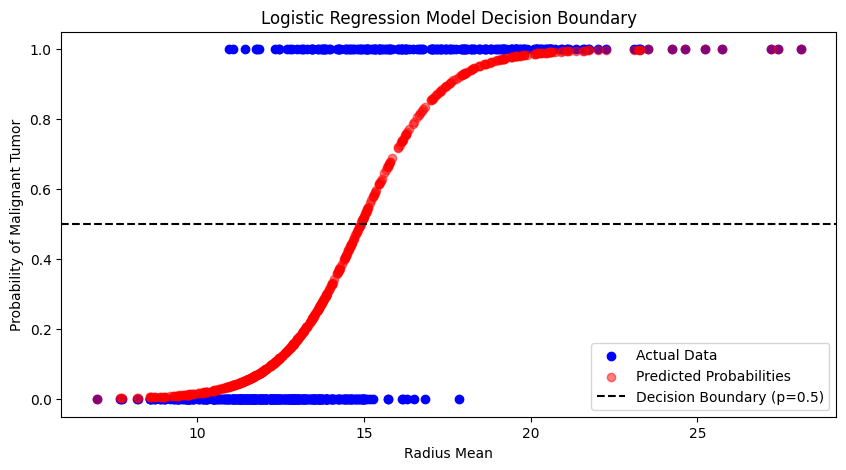

In [109]:
m = len(y)  # Number of samples
cost_history = []

for epoch in range(epochs):
    z = np.dot(X_scaled, theta)  # Compute linear combination
    h = sigmoid(z)  # Apply sigmoid function
    gradient = np.dot(X_scaled.T, (h - y)) / m  # Compute gradient
    theta -= alpha * gradient  # Update parameters
    
    # Compute and store cost
    cost = compute_cost(X_scaled, y, theta)
    cost_history.append(cost)

# Predict probabilities using the trained logistic regression model
y_pred_probs = sigmoid(np.dot(X_scaled, theta))

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(y_pred == y) * 100

# Display final model parameters and accuracy
print("Final parameters after training:")
print(f"Intercept (Bias): {theta[0]}")
print(f"Coefficient for radius_mean': {theta[1]}")
print(f"Model Accuracy: {accuracy:.2f}%")


# Plot decision boundary
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.scatter(X, y_pred_probs, color='red', alpha=0.5, label="Predicted Probabilities")
plt.axhline(0.5, color='black', linestyle='--', label="Decision Boundary (p=0.5)")
plt.xlabel("Radius Mean")
plt.ylabel("Probability of Malignant Tumor")
plt.title("Logistic Regression Model Decision Boundary")
plt.legend()
plt.show()


Quadratic Model Accuracy: 88.22%


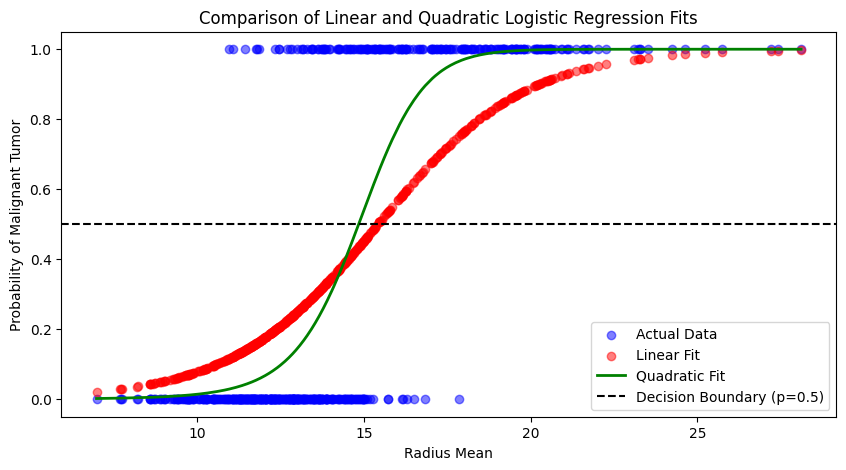

In [111]:
X_scaled_with_bias = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# Train linear logistic regression manually
theta = np.zeros(3)  # Change from 2 to 3 to match X_scaled_with_bias
alpha = 0.01
epochs = 1000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(epochs):
    z = np.dot(X_scaled_with_bias, theta)
    h = sigmoid(z)
    gradient = np.dot(X_scaled_with_bias.T, (h - y)) / len(y)
    theta -= alpha * gradient

# Predict probabilities for linear model
y_pred_probs = sigmoid(np.dot(X_scaled_with_bias, theta))

# ---- Quadratic Logistic Regression (Using Scikit-Learn) ----
# Generate quadratic features
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X_scaled)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_poly, y)

# Predict probabilities for quadratic model
y_pred_probs_poly = log_reg.predict_proba(X_poly)[:, 1]

# Compute accuracy
accuracy_poly = np.mean((y_pred_probs_poly >= 0.5).astype(int) == y) * 100

# Print accuracy
print(f"Quadratic Model Accuracy: {accuracy_poly:.2f}%")

# Sort X for smoother decision boundary curve
X_sorted, y_sorted_probs_poly = zip(*sorted(zip(X.flatten(), y_pred_probs_poly)))

# ---- Plot Comparison ----
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.5)
plt.scatter(X, y_pred_probs, color='red', alpha=0.5, label="Linear Fit")
plt.plot(X_sorted, y_sorted_probs_poly, color='green', label="Quadratic Fit", linewidth=2)
plt.axhline(0.5, color='black', linestyle='--', label="Decision Boundary (p=0.5)")
plt.xlabel("Radius Mean")
plt.ylabel("Probability of Malignant Tumor")
plt.title("Comparison of Linear and Quadratic Logistic Regression Fits")
plt.legend()
plt.show()

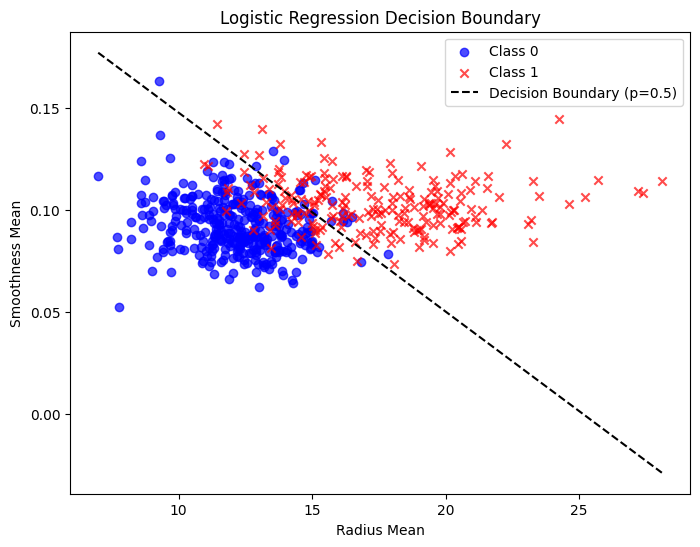

In [115]:
features = ['radius_mean', 'smoothness_mean']
X = df[features].values  # Extract selected features
y = df['diagnosis'].values  # Target variable

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term (bias)
X_scaled_with_bias = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# Initialize parameters for gradient descent
theta = np.zeros(X_scaled_with_bias.shape[1])  # 3 parameters (bias + 2 features)
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
for epoch in range(epochs):
    z = np.dot(X_scaled_with_bias, theta)
    h = sigmoid(z)
    gradient = np.dot(X_scaled_with_bias.T, (h - y)) / len(y)
    theta -= alpha * gradient

# Define decision boundary (where probability = 0.5)
# θ0 + θ1*x1 + θ2*x2 = 0  -> Solving for x2 (smoothness_mean)
x1_vals = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)  # radius_mean range
x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]  # Compute corresponding smoothness_mean

# Transform x1_vals back to original scale for plotting
x1_vals_original = scaler.inverse_transform(np.column_stack((x1_vals, np.zeros_like(x1_vals))))[:, 0]
x2_vals_original = scaler.inverse_transform(np.column_stack((np.zeros_like(x1_vals), x2_vals)))[:, 1]

# Plot the data and decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot of data points
for label, marker, color in zip([0, 1], ['o', 'x'], ['blue', 'red']):
    plt.scatter(df.loc[y == label, 'radius_mean'], df.loc[y == label, 'smoothness_mean'],
                marker=marker, color=color, label=f'Class {label}', alpha=0.7)

# Plot decision boundary
plt.plot(x1_vals_original, x2_vals_original, color='black', linestyle='--', label='Decision Boundary (p=0.5)')

# Labels and title
plt.xlabel('Radius Mean')
plt.ylabel('Smoothness Mean')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Generate quadratic features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(z)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_poly, y_train)

# Predict probabilities for quadratic model
y_pred_probs_poly = log_reg.predict_proba(X_poly)[:, 1]

# Compute accuracy
accuracy_poly = np.mean((y_pred_probs_poly >= 0.5).astype(int) == y_train) * 100

# Print accuracy
print(f"Quadratic Model Accuracy: {accuracy_poly:.2f}%")

# Sort z for smoother decision boundary curve
z_sorted, y_sorted_probs_poly = zip(*sorted(zip(z.flatten(), y_pred_probs_poly)))

# Plot the data and decision boundary
plt.figure(figsize=(10, 5))
plt.scatter(z, y_train, color='blue', label="Actual Data", alpha=0.5)
plt.plot(z_sorted, y_sorted_probs_poly, color='green', label="Quadratic Fit", linewidth=2)
plt.axhline(0.5, color='black', linestyle='--', label="Decision Boundary (p=0.5)")
plt.xlabel("z")
plt.ylabel("Probability of Positive Class")
plt.title("Quadratic Logistic Regression Fit")
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.23406728e+00  1.84069356e+00  2.59195792e+00  3.93867834e-01
  2.43257748e+00  1.78611056e-01  1.25452327e+00  3.34205620e-01
  4.02653922e-01 -2.41232923e-01 -3.27146960e-01  2.58723962e-01
  1.79562423e+00 -3.13583810e-01  7.56745717e-02  4.76491178e-01
 -1.63071339e-01  1.33383130e+00  2.12513663e+00 -7.15840619e-01
 -4.74650154e-01 -2.31650983e+00  5.31500598e-01  2.54578825e+00
  1.34145205e+00  1.86140299e+00  1.02412130e-01  1.40565608e+00
  5.55040558e-01  1.12612656e+00  1.96812447e+00 -8.74938698e-01
  1.85822517e+00  1.68419346e+00  7.34224968e-01  6.43910330e-01
 -3.76556614e-01 -1.31211759e+00 -2.45187281e-01 -5.67066711e-01
 -1.50658677e+00 -7.30540890e-01  1.44674182e+00 -5.41614036e-01
 -9.12054972e-01  2.13854257e+00 -3.66059606e+00 -5.13892654e-02
 -1.14035345e+00 -1.21199368e+00 -2.04229222e+00 -1.63673993e+00
 -2.13484621e+00  2.17135712e+00 -3.48435349e-01 -1.74100369e+00
  2.17797163e+00  5.43644266e-01 -1.72885246e+00 -2.93965594e+00
 -1.50992936e+00 -1.71345252e+00 -6.89124413e-02 -3.62707448e+00
 -4.37581874e-01  7.36526423e-01 -2.24178466e+00 -2.47416410e+00
 -2.33619942e+00 -1.03331006e+00  1.35512630e+00 -2.80405172e+00
  1.35793888e+00 -4.64807941e-01 -1.54842650e+00  1.39025786e-01
  7.23795362e-01  1.71215374e+00  3.68845342e+00 -9.49860297e-01
 -1.08244485e+00 -3.43999978e-01  4.92427508e+00  2.87575244e+00
 -1.43356283e+00  1.53844017e+00 -4.48030251e-01  1.40029351e+00
 -1.71045670e+00  4.89132801e-01 -6.01911638e-01 -1.60711498e-01
 -1.95518173e+00 -5.52871008e-01  2.48881750e-01  1.98000272e+00
 -1.01737391e+00 -2.18936325e+00 -1.95458968e+00 -3.32926544e-01
 -8.18610509e-01 -2.77664221e+00 -2.14140517e+00 -2.23701200e+00
 -1.98928873e+00  1.02861940e+00 -8.12587172e-01 -1.84652122e+00
  4.81194534e+00 -2.17471957e+00 -2.13389543e+00 -1.05365620e+00
 -1.28807779e+00 -1.41252203e+00 -2.08489368e+00 -1.44425691e+00
 -2.92425293e+00  7.30838165e-01  1.10739754e+00  6.30367902e-01
 -1.86007120e+00  1.93547934e+00  6.25961720e+00  2.83250387e-01
 -2.02095017e+00 -1.03503168e+00 -9.24694706e-01  1.01678455e+00
  7.78824559e-01  2.26328517e+00 -9.16021611e-01  6.73049111e-01
  6.00107998e-01  1.12887841e-01  1.32915873e+00 -1.39572173e+00
 -1.20086192e+00 -1.72839690e+00  7.89842441e-01 -8.72856555e-01
 -2.66800132e+00  4.12060343e-01 -1.13755404e+00 -1.51166225e+00
 -2.88534909e+00 -6.49650501e-01 -9.75932360e-01 -8.39241845e-01
 -2.23391551e-01 -1.47235179e+00 -2.33851263e-01 -3.27896790e+00
 -1.99312989e+00 -1.80115353e+00 -1.07324836e+00 -1.81430344e+00
  1.77653753e+00 -3.09736716e-01 -1.59663504e+00 -2.94618042e+00
 -1.00762113e+00  1.32215737e+00  2.65772636e+00 -1.09769668e+00
  3.03760949e+00 -6.99726535e-01 -2.03219964e+00  3.18261024e-01
  1.37777296e+00 -3.83146248e-02 -1.03288460e+00 -1.10242480e+00
  1.43408792e+00 -1.69146510e+00 -2.46500999e+00 -3.19904273e+00
 -2.38632584e+00  6.20044677e-01 -2.58119899e+00 -1.52350095e+00
  5.96582049e+00  3.42850761e+00  1.70661840e-01 -2.00489919e+00
 -2.67103501e-01 -2.50650615e+00  8.77898955e-01 -1.54033136e+00
 -1.35887749e+00 -2.05658864e+00  3.75303901e-02 -1.53685984e+00
 -3.73693035e+00 -9.96224839e-01  1.82087296e-01 -1.84663887e+00
  4.11898411e-01  2.13240509e-01  1.23879326e+00 -2.64099832e-01
 -1.39341744e+00  7.07221991e-01  4.41692621e+00  9.97189498e-01
 -1.11078165e+00 -4.22472141e-01 -1.84957406e+00  3.78700781e-01
 -7.97873737e-01 -6.75177499e-01  2.12930752e+00 -1.89842059e+00
  6.58707385e+00  1.15697757e+00 -5.69558316e-01 -3.50216299e-01
 -1.64902859e+00 -3.01207124e+00  1.91401025e+00  1.34853441e+00
 -7.27764030e-01 -3.69691742e-01 -1.84213856e+00  4.94312773e-01
 -1.45243488e+00 -2.97838750e-01 -1.76222431e+00 -7.09309881e-01
 -1.99445737e+00 -5.27009815e-01  1.61341165e+00 -3.04898325e+00
 -2.68018300e+00  2.12968310e+00 -3.10735961e+00 -8.22708912e-01
  3.50417476e+00  1.74537121e+00 -1.12801208e+00  1.06056238e+00
 -8.35112390e-01 -2.07370518e+00 -1.80848153e+00 -1.42219665e+00
  2.14341379e+00 -1.66584300e+00 -2.05120441e+00 -1.47787250e+00
 -2.07053398e+00 -1.46149489e+00  2.74305968e+00 -1.83255049e+00
  2.45310905e+00  1.11228854e+00  2.20277670e+00  1.75767683e-02
  1.74495797e+00  1.73095235e+00  8.41315406e-01  5.70740458e-01
  2.42772604e+00  4.80720461e-01  6.09200001e-01 -6.80164488e-01
  8.99590195e-01  2.37150801e+00 -2.07869973e+00 -1.53420913e+00
 -1.18013643e+00 -1.50716005e+00 -1.92401913e+00 -1.70135531e+00
  2.79841079e+00 -2.76444738e+00  8.30322024e-01 -3.17441295e-01
 -1.89324628e+00  1.25705348e+00 -1.53789902e+00 -6.97868428e-01
  2.00329981e+00 -2.43133601e+00  2.18953735e+00  9.03567164e-01
 -1.91235648e+00 -1.78642315e+00 -1.97618115e+00 -2.31040284e+00
 -2.55151520e+00 -2.18245797e+00 -7.96348819e-01 -4.40853795e-01
 -8.55921656e-01 -2.12408436e+00 -1.13590958e+00 -8.80483856e-01
 -2.47906826e+00 -1.42838758e+00 -1.86969593e+00 -1.90604417e+00
  2.76914018e+00 -1.81358522e+00  2.69787269e+00 -1.67057490e+00
 -2.07744968e+00 -2.65059426e+00 -1.45344301e+00 -4.03504484e+00
 -1.84216111e+00 -1.59417166e+00 -1.98761038e+00 -1.23183998e+00
 -1.52059705e+00 -2.15958351e+00 -2.49339004e+00 -1.77243265e+00
 -2.27008991e+00  1.37157452e+00 -2.64953383e+00 -2.23940832e+00
 -1.81068888e+00  1.44708729e+00 -3.01362985e-01  3.22530507e+00
 -1.82800402e+00 -8.75636189e-01 -6.76531099e-01 -2.36100510e+00
  1.39211831e+00  1.36917607e+00  2.70033651e-01 -1.05968521e+00
 -1.40717263e+00 -2.42409462e+00 -1.94912073e+00  1.51643262e+00
 -1.10915697e+00  1.32810072e+00 -2.14961236e+00  4.18367840e+00
 -3.33387780e-01 -3.08199664e+00 -1.57591710e+00  2.05104806e+00
 -7.44238638e-01 -2.14197562e+00 -2.02327801e+00 -5.84674601e-01
 -1.97010132e+00 -5.99512304e-01 -2.58350989e+00  1.49980647e+00
  5.55007114e+00  1.88682027e-01 -2.94951073e+00 -1.62613529e+00
 -4.55842094e-01 -1.04541796e+00 -3.49578564e+00 -2.41624629e+00
 -2.24579691e+00 -1.37576717e+00 -1.11378721e+00  5.71136756e-01
 -1.62833604e+00  2.09408230e+00  2.33448772e+00 -1.56614172e+00
  2.77259853e+00  3.48208250e+00  5.29573775e-01 -8.12130599e-01
  2.90857645e+00  2.32046428e+00 -1.32969349e+00  5.12353681e-01
 -2.37583808e+00 -1.79509813e+00 -1.35885393e+00 -7.22870257e-01
 -5.40647349e-01 -2.66557784e+00 -2.69702374e+00 -9.36861929e-01
 -1.48576339e+00 -7.45578068e-01 -2.08410934e+00 -1.83286674e+00
 -2.38789609e+00  2.13239591e+00 -2.08939475e+00 -2.59327099e+00
  1.00016778e+00  3.78205509e+00 -1.12711410e+00 -1.28199701e+00
 -3.55256950e-01 -1.84855253e+00 -2.77005618e+00 -1.81676493e+00
  2.41029319e+00 -1.85752404e+00 -2.09630384e+00 -9.39285763e-01
 -1.76095353e+00 -1.76358918e+00  3.21299524e-01 -2.05347764e+00
  1.55143853e+00 -1.79101951e+00 -2.12007162e+00 -1.38195905e+00
 -3.41204906e+00 -6.47384761e-01 -6.74426346e-01 -1.45992198e+00
 -2.26874154e+00  8.20166338e-01 -1.55170504e+00 -1.60017433e+00
 -2.16962809e+00  4.57488620e-02 -1.07513285e+00 -9.94939011e-01
 -1.97435073e+00 -3.05939119e+00 -2.07357531e+00 -2.39795951e+00
 -2.54949989e+00 -1.95275790e+00 -2.73306283e-02 -8.77020840e-01
  2.98276289e+00  1.84131950e+00 -5.17145937e-01 -1.39482439e-01
 -1.31343353e+00 -1.10049231e+00 -1.08161648e+00 -1.33640587e+00
 -2.26900084e+00  2.92108969e-01 -1.05172182e+00 -2.80524847e+00
  9.17683821e-01 -1.17192268e+00  1.27618251e+00 -4.26487719e-01
 -9.12631030e-01  2.63690771e+00 -2.92641223e+00  2.25183900e+00
 -2.02671187e+00  2.87504110e-01 -1.68081713e+00 -1.03402544e+00
 -1.76860911e+00 -1.31980422e+00 -1.60879471e+00 -3.24428786e+00
  9.29501796e-01  6.00955316e+00 -1.61353883e+00 -2.17367661e+00
 -1.94891269e+00 -1.54017226e+00 -1.40475724e+00 -3.13255127e+00
  8.82235503e-01 -6.69365034e-01 -2.84011592e+00 -1.86345139e+00
 -8.71169706e-01 -2.24579785e+00 -1.77670898e+00 -1.37568340e+00
 -8.10442865e-01 -1.91520577e+00 -1.32276556e+00  7.23565719e-01
 -1.65502371e+00 -1.37878872e+00 -3.17879920e-01 -5.65084336e-01
  5.68349565e-01 -1.32778455e+00 -7.46517483e-01  2.44735113e+00
 -8.59188915e-01 -3.53144639e-01 -2.02739430e+00  3.25302882e-01
  1.39899168e+00 -2.31125848e+00 -2.01382738e+00 -2.06853895e-01
 -6.63228705e-01 -1.58908301e+00  1.66538257e+00  2.94557506e+00
  6.04965574e-03  2.59092927e-01 -3.34436408e-01  3.37323466e+00
  3.90997228e-01 -1.17377913e+00 -7.64172483e-01 -8.33327722e-01
  3.61820489e-01  1.09277354e+00 -2.29942262e+00 -7.48088506e-01
 -1.87897128e-01 -2.24142704e-01 -2.97562941e-01 -1.37632067e+00
  1.84280392e+00  2.40968513e+00  9.50605776e-02 -3.92295122e-01
 -8.09921918e-01  4.50699142e+00 -2.32504850e+00 -5.76273536e-01
 -2.50741064e+00 -2.68034089e+00 -3.03923306e-01 -1.61289689e+00
  7.09669320e-01 -8.13115234e-01 -1.08141883e+00 -1.38026564e+00
 -8.84481546e-01  2.11032815e+00 -1.91741974e+00  2.74772192e+00
 -1.10662738e-01 -3.56561610e-01 -4.10195066e+00 -3.85611903e+00
 -1.51984967e+00 -7.32493097e-01 -8.70401609e-01 -1.37515250e+00
 -6.60286194e-01 -9.25736722e-01 -2.32165231e+00 -2.60551744e+00
 -3.04278963e+00 -2.66986639e+00 -3.00289547e+00 -1.89685145e+00
 -1.75502430e+00 -2.85457255e+00 -1.77617242e+00 -2.52146995e+00
 -2.11864086e+00 -3.32933746e+00 -8.46469129e-01 -1.86680148e+00
 -4.17521872e-01 -2.84183762e+00  3.62277946e-01  3.15841084e+00
  3.49668672e+00  2.24538359e+00  4.82837989e-02  3.37901702e+00
 -5.39562599e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate quadratic features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(z.reshape(-1, 1))  # ✅ Reshaped to 2D

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_poly, y_train)

# Predict probabilities for quadratic model
y_pred_probs_poly = log_reg.predict_proba(X_poly)[:, 1]

# Compute accuracy
accuracy_poly = np.mean((y_pred_probs_poly >= 0.5).astype(int) == y_train) * 100
print(f"Quadratic Model Accuracy: {accuracy_poly:.2f}%")

# Sort z for smoother decision boundary curve
z_sorted, y_sorted_probs_poly = zip(*sorted(zip(z.flatten(), y_pred_probs_poly)))

# Plot the data and decision boundary
plt.figure(figsize=(10, 5))
plt.scatter(z, y_train, color='blue', label="Actual Data", alpha=0.5)
plt.plot(z_sorted, y_sorted_probs_poly, color='green', label="Quadratic Fit", linewidth=2)
plt.axhline(0.5, color='black', linestyle='--', label="Decision Boundary (p=0.5)")
plt.xlabel("z")
plt.ylabel("Probability of Positive Class")
plt.title("Quadratic Logistic Regression Fit")
plt.legend()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [569, 4000]